In [90]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio
from rasterio.transform import Affine
from rasterio.enums import Resampling
import pandas as pd
from scipy.optimize import curve_fit

from cmcrameri import cm

In [91]:
def numpy2tif(outfile, data, crs, transform, nodata=9999):
    outds = rasterio.open(outfile, 'w', driver='GTiff', 
                  height = data.shape[0], 
                  width = data.shape[1], 
                  count=1, 
                  crs = crs, 
                  dtype = data.dtype,
                  transform = transform,
                  compress='lzw',
                  nodata = nodata)
    outds.write(data, 1)
    outds.close()
    
def tif2numpy(file):
    in_ds = rasterio.open(file)
    data = in_ds.read()
    return data

In [92]:
path = "/home/iganesh/GVDR/Sudenitsa/"
east1 = tif2numpy(path+"sud_east1.tif")
east2 = tif2numpy(path+"sud_east2.tif")
cen_east = tif2numpy(path+"sud_centereast.tif")
cen_west = tif2numpy(path+"sud_centerwest.tif")
arc1 = tif2numpy(path+"sud_arc1.tif")
arc2 = tif2numpy(path+"sud_arc2.tif")
arc3 = tif2numpy(path+"sud_arc3.tif")

In [93]:
east1_bsc = tif2numpy(path+"sud_east1_bsc.tif")
east2_bsc = tif2numpy(path+"sud_east2_bsc.tif")
cen_east_bsc = tif2numpy(path+"sud_centereast_bsc.tif")
cen_west_bsc = tif2numpy(path+"sud_centerwest_bsc.tif")
arc1_bsc = tif2numpy(path+"sud_arc1_bsc.tif")
arc2_bsc = tif2numpy(path+"sud_arc2_bsc.tif")
arc3_bsc = tif2numpy(path+"sud_arc3_bsc.tif")

In [94]:
east1_inc = tif2numpy(path+"sud_east1_inc.tif")
east2_inc = tif2numpy(path+"sud_east2_inc.tif")
cen_east_inc = tif2numpy(path+"sud_centereast_inc.tif")
cen_west_inc = tif2numpy(path+"sud_centerwest_inc.tif")
arc1_inc = tif2numpy(path+"sud_arc1_inc.tif")
arc2_inc = tif2numpy(path+"sud_arc2_inc.tif")
arc3_inc = tif2numpy(path+"sud_arc3_inc.tif")

In [95]:
## mean and stdev for SAR data
mean_east1_bsc = np.nanmean(east1_bsc)
mean_east2_bsc = np.nanmean(east2_bsc)
mean_cen_east_bsc = np.nanmean(cen_east_bsc)
mean_cen_west_bsc = np.nanmean(cen_west_bsc)
mean_arc1_bsc = np.nanmean(arc1_bsc)
mean_arc2_bsc = np.nanmean(arc2_bsc)
mean_arc3_bsc = np.nanmean(arc3_bsc)

mean_east1_inc = np.nanmean(east1_inc)
mean_east2_inc = np.nanmean(east2_inc)
mean_cen_east_inc = np.nanmean(cen_east_inc)
mean_cen_west_inc = np.nanmean(cen_west_inc)
mean_arc1_inc = np.nanmean(arc1_inc)
mean_arc2_inc = np.nanmean(arc2_inc)
mean_arc3_inc = np.nanmean(arc3_inc)

In [96]:
n = 9
## calculating mean for gvdr data
mean_east1 = np.mean(east1, axis = (1,2))[0:n]
mean_east2 = np.mean(east2, axis = (1,2))[0:n]
mean_cen_east = np.mean(cen_east, axis = (1,2))[0:n]
mean_cen_west = np.mean(cen_west, axis = (1,2))[0:n]
mean_arc1 = np.mean(arc1, axis = (1,2))[0:n]
mean_arc2 = np.mean(arc2, axis = (1,2))[0:n]
mean_arc3 = np.mean(arc3, axis = (1,2))[0:n]

In [97]:
## calculating standard deviation for std data
std_east1 = np.std(east1, axis = (1,2))
std_east2 = np.std(east2, axis = (1,2))
std_cen_east = np.std(cen_east, axis = (1,2))
std_cen_west = np.std(cen_west, axis = (1,2))
std_arc1 = np.std(arc1, axis = (1,2))
std_arc2 = np.std(arc2, axis = (1,2))
std_arc3 = np.std(arc3, axis = (1,2))

In [98]:
## adding sar dtaa to gvdr data
mean_east1 = np.append(10*np.log10(mean_east1), mean_east1_bsc)
mean_east2 = np.append(10*np.log10(mean_east2), mean_east2_bsc)
mean_cen_east = np.append(10*np.log10(mean_cen_east), mean_cen_east_bsc)
mean_cen_west = np.append(10*np.log10(mean_cen_west), mean_cen_west_bsc)
mean_arc1 = np.append(10*np.log10(mean_arc1), mean_arc1_bsc)
mean_arc2 = np.append(10*np.log10(mean_arc2), mean_arc2_bsc)
mean_arc3 = np.append(10*np.log10(mean_arc3), mean_arc3_bsc)

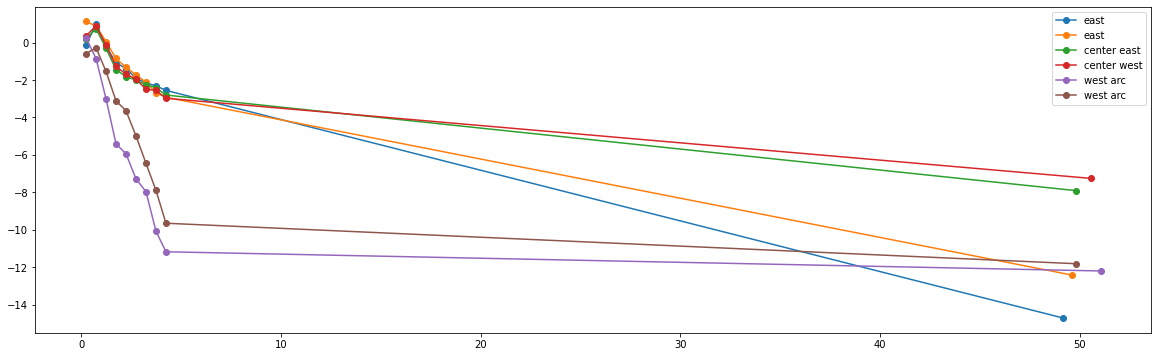

In [99]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(20,6)
cmap = cm.hawaii

theta_i = np.arange(0.25, 10.25+0.25, 0.5)[0:n+1]
theta_i[-1] = mean_east1_inc
ax.plot(theta_i, mean_east1,  "o-", label = "east")

theta_i[-1] = mean_east2_inc
ax.plot(theta_i, mean_east2,  "o-", label = "east")

theta_i[-1] = mean_cen_east_inc
ax.plot(theta_i, mean_cen_east, "o-", label = "center east")

theta_i[-1] = mean_cen_west_inc
ax.plot(theta_i, mean_cen_west,  "o-", label = "center west")

theta_i[-1] = mean_arc1_inc
ax.plot(theta_i, mean_arc1,  "o-", label = "west arc")

theta_i[-1] = mean_arc2_inc
# ax.plot(theta_i, mean_arc2, "o-", label = "west arc")

theta_i[-1] = mean_arc3_inc
ax.plot(theta_i, mean_arc3,  "o-", label = "west arc")

plt.legend()
plt.show()

In [79]:
min_prad = [6053.66, 6054.05, 6053.98, 6050.43, 6050.67, 6052.29, 6051.79]
max_prad = [6054.62, 6055.01, 6056.41, 6058.55, 6054.28, 6053.94, 6053.11]
mean_prad = [6054.23, 6054.64, 6055.22, 6055.30, 6052.5, 6053.26, 6052.54]
std_prad = [0.23, 0.19, 0.40, 0.89, 0.38, 0.31, 0.17]

In [74]:
print(mean_arc1)

[  0.24211931  -0.8559812   -3.0025861   -5.4127827   -5.9440703
  -7.284165    -7.964836   -10.077904   -11.179184   -18.081144
         -inf -12.204394  ]
